In [1]:
using LinearAlgebra
import Pkg; Pkg.add("Images")
import Pkg; Pkg.add("JLD")
using Images # read and show images, more info here: https://github.com/JuliaImages/Images.jl
using JLD # used for File I/O, more info here: https://github.com/JuliaIO/JLD.jl
using Plots

    Updating registry at `C:\Users\jarpa\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\jarpa\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\jarpa\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jarpa\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\jarpa\.julia\environments\v1.6\Manifest.toml`


In [5]:
function compressão(A,k) #determine B(m,k) e C(k,n) tal que A(m,n) é aproximadamente B*C
    m,n=size(A)
    local C
    B=randn(m,k) #matrix aleatória m por k "sorteio da base inicial"
    #alternating least squares
    for i=1:100
        C=B\A
        B=A/C    
    end
    erro=norm(A-B*C)
    return B,C,erro
end

compressão (generic function with 1 method)

In [4]:
A= [1 2 1 11 101 1001;1 2 2 12 102 1002;1 2 3 13 103 1003]

3×6 Matrix{Int64}:
 1  2  1  11  101  1001
 1  2  2  12  102  1002
 1  2  3  13  103  1003

In [4]:
B=[1 1; 1 2; 1 3]
#C=B\A

3×2 Matrix{Int64}:
 1  1
 1  2
 1  3

In [36]:
B,C,erro=compressão(A,2)

([0.33776249255941393 0.7737886263558043; -0.06907783074011777 0.5926527453890572; -0.5609959341272067 0.3736117667486517], [-0.9104494260123649 -1.5801813230367463 … -74.59934097380153 -717.7126117333084; 1.4909225534197772 3.1860763793845965 … 163.47780182229238 1607.009694810205], 0.1705578248894144)

In [6]:
A= [1 2 1 11 101 1001;1 2 2 12 102 1002;1 2 3 13 103 1003]+0.1*randn(3,6)

3×6 Matrix{Float64}:
 0.829251  1.9793   1.15203  11.0078  101.264  1001.07
 0.977353  1.9103   2.07118  11.7999  102.105  1001.97
 1.05381   2.11626  3.0839   13.003   102.897  1003.03

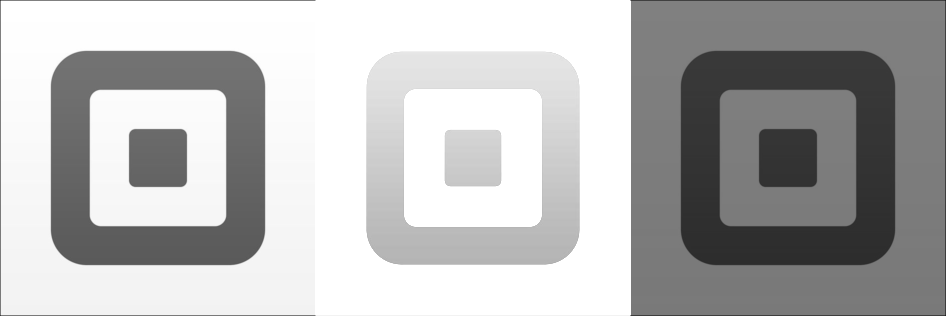

In [12]:
img = load("simples.jpg");
display(Gray.([img 2.0*img 0.5*img]))

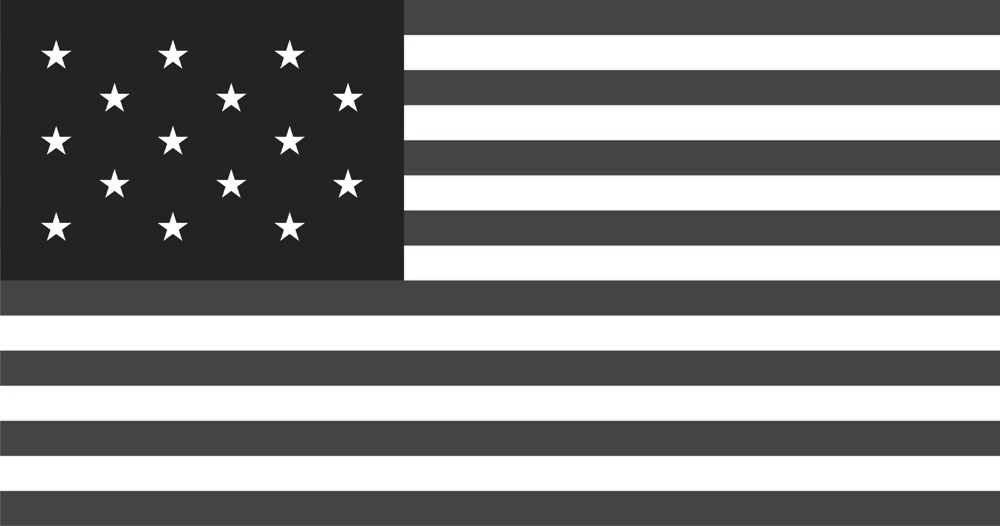

In [6]:
img = load("bandeira.jpg");
#display(Gray.([2*img 1.5*img img]))
display(Gray.(img))
# Get image as a raw matrix
bandeira = channelview(Gray.(img[:,:]));

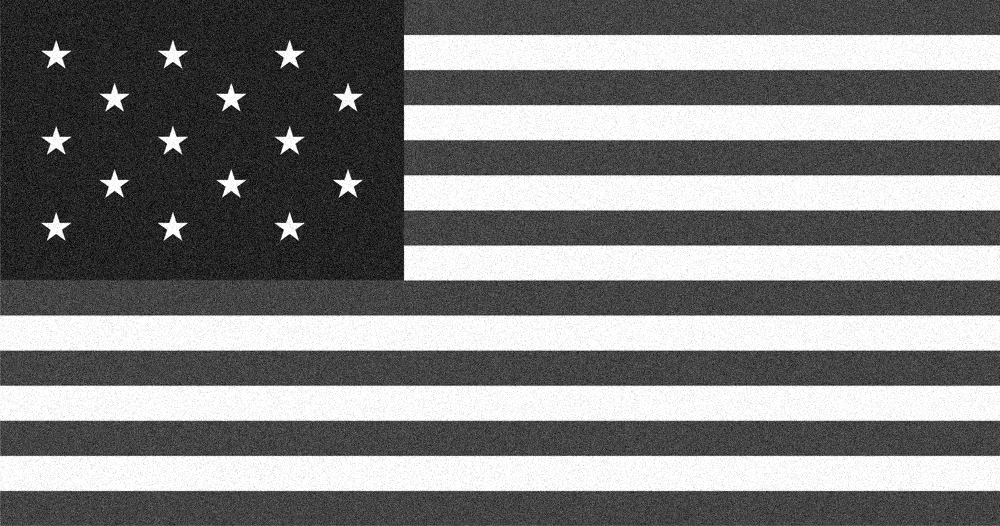

In [85]:
bandeira_ruidosa=bandeira+0.05*randn(526,1000)
display(Gray.(bandeira_ruidosa))

In [86]:
rank(bandeira), rank(bandeira_ruidosa)

(114, 526)

In [9]:
size(bandeira)

(526, 1000)

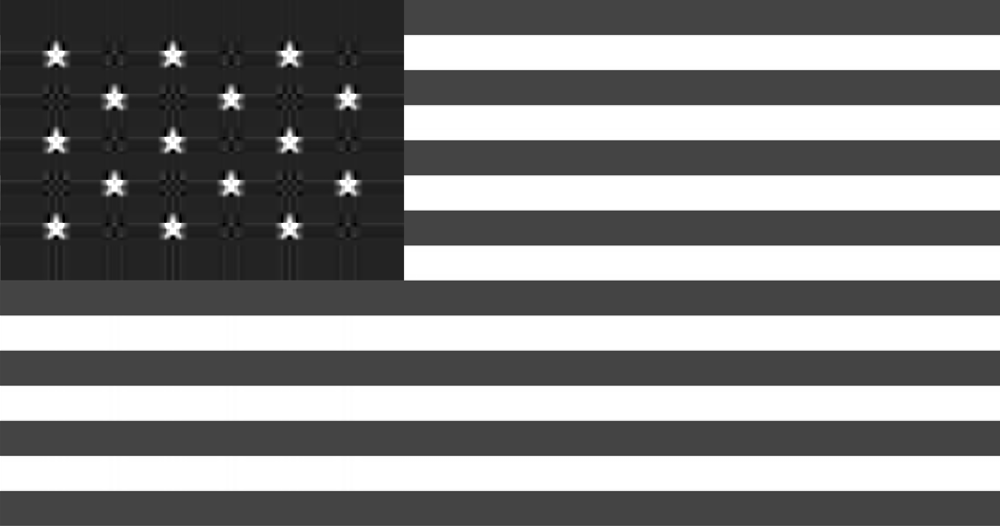

In [18]:
B,C,erro=compressão(bandeira,6)
bandeira_comprimida=B*C
display(Gray.(bandeira_comprimida))

In [ ]:
bandeira

In [ ]:
n=30
erro=zeros(n,1)
for i=1:n
    B,C,erro[i]=compressão(bandeira,i)
end

plot(erro)

In [42]:
size(bandeira)

(526, 1000)

In [43]:
15260/526000

0.029011406844106465